# K Nearest Neghbors

Make predictions based off of the closest observations.

Pros:

- Fast to train
- Intuitive
- can pick up on arbitrary patterns (unline logit or dtrees)
- one assumption: closer points are more similar

Cons:

- `k` is unknown
- Model parameter is the entire training dataset
- Prediction can be expensive (lazy)
- Because distance is used, scaling is important
- No feature weights

Hyperparams:

- **k**: `n_neighbors`: closest k datapoints to consider
- weights
    - uniform: each k closest point's vote has equal weight
    - distance: votes are weighted by distance to the new observation
- distance metric

## Plan

1. Demo KNN in a single dimension
2. Demo in 2 dimensions
3. See the need for scaling
4. Compare model performance on unscaled vs scaled data
5. How to choose `k` ? Visualize model performance

What's a hyperparameter?

- A value we choose ahead of time that is **not** learned from the data
- C in LogisticRegression
- max_depth in a DecisionTree
- n_neighbors in k nearest neighbors

What's a parameter?

- values "learned" from the training data
- the information we need to make predictions

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import knn_lesson_util as util

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [6]:
plt.rc('axes', grid=True)
plt.rc('figure', figsize=(11, 8.5))
plt.rc('axes.spines', top=False, right=False)

For the sake of simplicity in the lesson, we're just going to look at train and test.

In a real project, what I refer to as test here would be your validate split.

In [7]:
train, test = util.get_ice_cream_data()

In [11]:
train

,flavor,pints,n_sprinkles
1,blueberry,5.675963,920.602933
88,blueberry,5.129386,1008.776607
58,pistachio,14.182332,867.770112
30,pistachio,15.955832,997.500795
61,chocolate,10.748216,964.000000
...,...,...,...
72,blueberry,5.904306,762.255121
50,chocolate,9.264783,973.000000
36,pistachio,15.160544,1111.158150
56,pistachio,14.986396,1110.378793


In [15]:
train.groupby('flavor').pints.mean()

flavor
blueberry     4.885319
chocolate    10.111288
pistachio    14.798313
Name: pints, dtype: float64

## Single Dimension Example

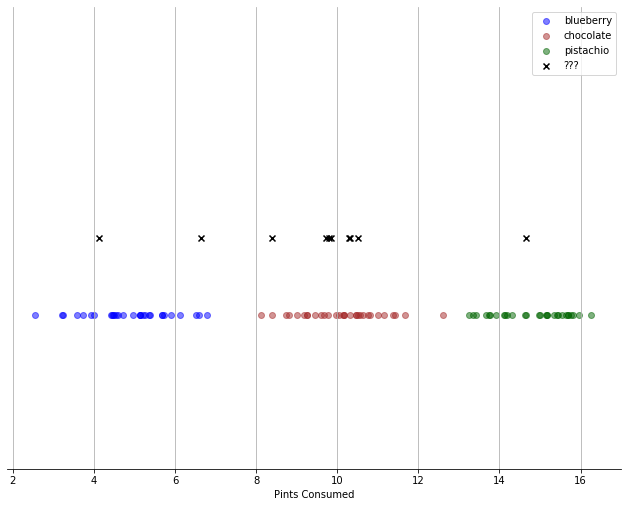

In [18]:
util.plot_pints(train, test, plot_test=True)

## 2d Example

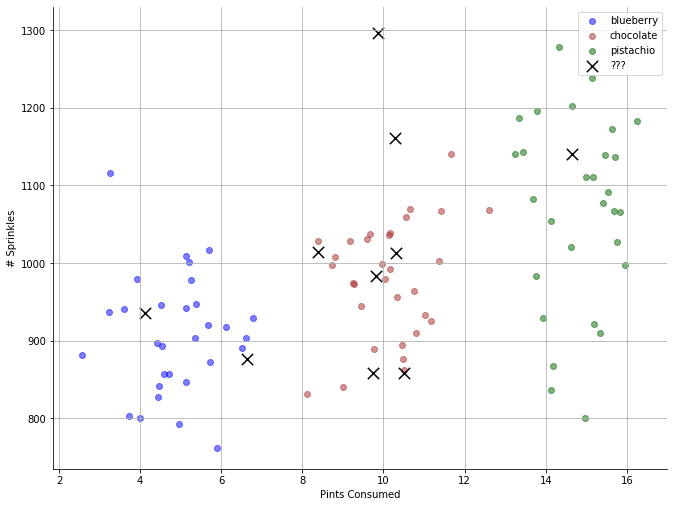

In [21]:
util.plot_pints_and_sprinkles(train, test, plot_test=True)4

How do we calculate distance? Euclidean distance

$$ \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2} $$

In [22]:
X_train = train[['pints', 'n_sprinkles']]
X_test = test[['pints', 'n_sprinkles']]
y_train = train.flavor
y_test = test.flavor

In [29]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.3

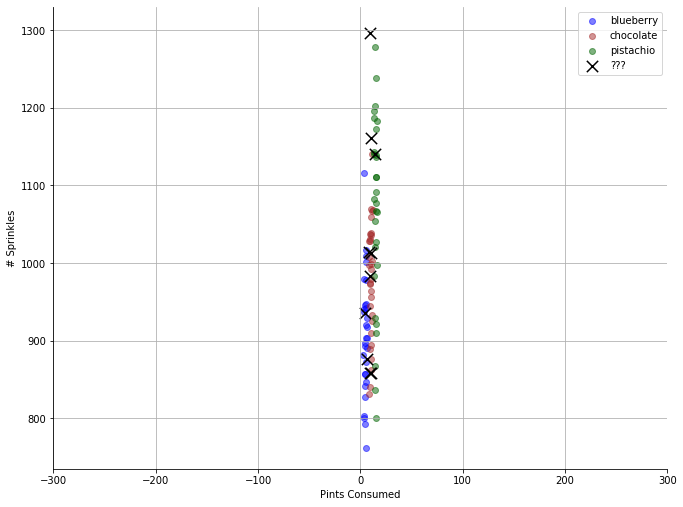

In [25]:
util.plot_pints_and_sprinkles(train, test, plot_test=True, same_xy_scale=True)

In [27]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)

1.0

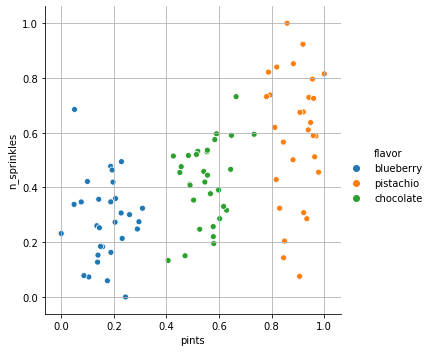

In [36]:
# visualizing the scaled data
scaled_data = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
scaled_data['flavor'] = y_train

sns.relplot(data=scaled_data, y='n_sprinkles', x='pints', hue='flavor')

## How do we choose a value for `k`?

- **Measure**
- Create models with different values of k (e.g. for every k in range(1, 21)) and compare the selection of k with that model's accuracy (or performance metric of your choice) (on unseen data!).

([<matplotlib.axis.XTick at 0x11e857eb8>,
 <a list of 22 Text xticklabel objects>)

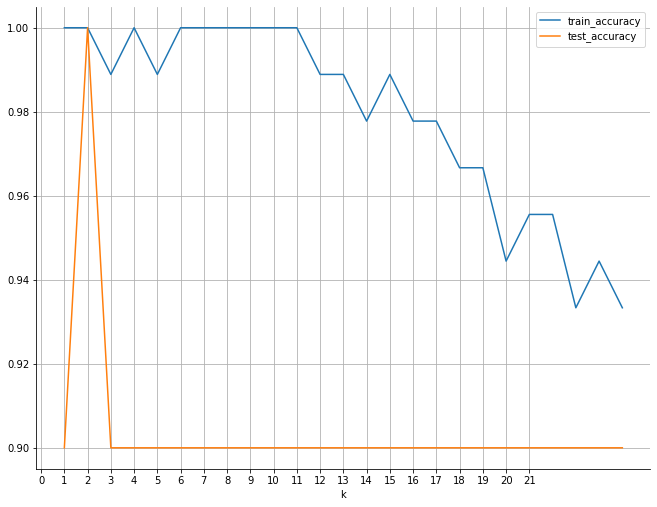

In [38]:
util.plot_k_vs_accuracy(X_train_scaled, y_train, X_test_scaled, y_test)
plt.xticks(np.arange(0, 22, 1))

In [40]:
for k in range(1, 26):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    accuracy = knn.score(X_test_scaled, y_test)
    print(f'{k:2d}: {accuracy:.2%}')

 1: 90.00%
 2: 100.00%
 3: 90.00%
 4: 90.00%
 5: 90.00%
 6: 90.00%
 7: 90.00%
 8: 90.00%
 9: 90.00%
10: 90.00%
11: 90.00%
12: 90.00%
13: 90.00%
14: 90.00%
15: 90.00%
16: 90.00%
17: 90.00%
18: 90.00%
19: 90.00%
20: 90.00%
21: 90.00%
22: 90.00%
23: 90.00%
24: 90.00%
25: 90.00%
